In [33]:
# Annovar version has failed to merge together AGAIN
%pip install pyVCF


import vcf
import pandas as pd

# Function to convert VCF to DataFrame
def vcf_to_dataframe(vcf_file, version='multianno'):
    vcf_reader = vcf.Reader(open(vcf_file, 'r'))
    records = []

    # Iterate over each record in the VCF file
    for record in vcf_reader:
        info = record.INFO
        record_data = {
            'CHROM': record.CHROM,
            'POS': record.POS,
            'ID': record.ID,
            'REF': record.REF,
            'ALT': [str(a) for a in record.ALT]}
        
        if version != 'multianno':
            record_data.update({
                'ALLELEID': info.get('ALLELEID'),
                'CLNDISDB': info.get('CLNDISDB'),
                'CLNDN': info.get('CLNDN'),
                'CLNHGVS': info.get('CLNHGVS'),
                'CLNREVSTAT': info.get('CLNREVSTAT'),
                'CLNSIG': info.get('CLNSIG'),
                'CLNVC': info.get('CLNVC'),
                'CLNVCSO': info.get('CLNVCSO'),
                'GENEINFO': info.get('GENEINFO'),
                'MC': info.get('MC'),
                'ORIGIN': info.get('ORIGIN'),
                # Add more fields as needed
        })
        else:
            record_data.update({
                'READ DEPTH': info.get('DP'),
                'AF': info.get('AF')
            })
        records.append(record_data)

    return pd.DataFrame(records)

%timeit
# Convert VCF to DataFrame
clin_vcf_df = vcf_to_dataframe('../data/clinvar_20231217m.vcf', version='clinvar')
multianno_vcf = vcf_to_dataframe('../data/10847101_clinvar.hg38_multianno.vcf')


Note: you may need to restart the kernel to use updated packages.


In [34]:
a = multianno_vcf.drop(columns='ID')
b = clin_vcf_df.copy()
a['ALT'], b['ALT'] = a['ALT'].astype(str), b['ALT'].astype(str)

merged_df = a.merge(b, on=['CHROM','POS', 'REF', 'ALT'], how='inner')

merged_df[merged_df.CLNSIG.astype(str).str.contains('Benign') == False]

,CHROM,POS,REF,ALT,READ DEPTH,AF,ID,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,GENEINFO,MC,ORIGIN
0,chr1,976215,A,['G'],37,[0.5],1320032,1310278,"[Human_Phenotype_Ontology:HP:0032647, MedGen:C5397664|Human_Phenotype_Ontology:HP:0001932, Human_Phenotype_Ontology:HP:0008264, MedGen:C4021547]",[Renal_tubular_epithelial_cell_apoptosis|Neutrophil_inclusion_bodies],[NC_000001.11:g.976215A>G],[no_assertion_criteria_provided],[Pathogenic],single_nucleotide_variant,SO:0001483,PERM1:84808,[SO:0001583|missense_variant],[0]
37,chr1,1373827,G,['A'],15,[0.5],2366310,2347231,"[MeSH:D030342, MedGen:C0950123]",[Inborn_genetic_diseases],[NC_000001.11:g.1373827G>A],"[criteria_provided, _single_submitter]",[Uncertain_significance],single_nucleotide_variant,SO:0001483,AURKAIP1:54998,[SO:0001583|missense_variant],[1]
53,chr1,2408691,G,['A'],11,[0.5],1504194,1337070,[MedGen:C1864399],"[Peroxisome_biogenesis_disorder, _complementation_group_7]",[NC_000001.11:g.2408691G>A],"[criteria_provided, _single_submitter]",[Uncertain_significance],single_nucleotide_variant,SO:0001483,PEX10:5192,"[SO:0001583|missense_variant, SO:0001619|non-coding_transcript_variant, SO:0001623|5_prime_UTR_variant]",[1]
118,chr1,5948206,G,['A'],22,[0.5],498135,489559,"[MedGen:CN517202|Human_Phenotype_Ontology:HP:0000090, Human_Phenotype_Ontology:HP:0004748, MONDO:MONDO:0019005, MedGen:C0687120, OMIM:PS256100, Orphanet:655]",[not_provided|Nephronophthisis],[NC_000001.11:g.5948206G>A],"[criteria_provided, _multiple_submitters, _no_conflicts]",[Uncertain_significance],single_nucleotide_variant,SO:0001483,NPHP4:261734,"[SO:0001583|missense_variant, SO:0001619|non-coding_transcript_variant, SO:0001623|5_prime_UTR_variant]",[1]
132,chr1,7664992,C,['T'],16,[0.5],1925221,1990583,[MedGen:CN517202],[not_provided],[NC_000001.11:g.7664992C>T],"[criteria_provided, _single_submitter]",[Likely_benign],single_nucleotide_variant,SO:0001483,CAMTA1:23261,[SO:0001819|synonymous_variant],[1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24818,chrX,150596742,T,['C'],3,[1.0],2500866,2523761,"[MONDO:MONDO:0010683, MedGen:C0410203, OMIM:310400, Orphanet:596]",[Severe_X-linked_myotubular_myopathy],[NC_000023.11:g.150596742T>C],"[criteria_provided, _single_submitter]",[Uncertain_significance],single_nucleotide_variant,SO:0001483,MTM1:4534,[SO:0001627|intron_variant],[1]
24836,chrX,153796262,T,['C'],2,[1.0],1706820,1705131,[MedGen:CN517202],[not_provided],[NC_000023.11:g.153796262T>C],"[criteria_provided, _single_submitter]",[Likely_benign],single_nucleotide_variant,SO:0001483,SSR4:6748,[SO:0001627|intron_variant],[1]
24841,chrX,153905964,G,['A'],18,[1.0],2598807,2763710,"[MeSH:D030342, MedGen:C0950123]",[Inborn_genetic_diseases],[NC_000023.11:g.153905964G>A],"[criteria_provided, _single_submitter]",[Likely_benign],single_nucleotide_variant,SO:0001483,AVPR2:554,[SO:0001583|missense_variant],[1]
24844,chrX,154362674,G,['A'],18,[0.5],1578621,1652303,"[MONDO:MONDO:0010233, MedGen:C1848213, OMIM:300049, Orphanet:2149, Orphanet:82004|MONDO:MONDO:0015942, MedGen:C0265293, OMIM:PS305620, Orphanet:1826|MONDO:MONDO:0010571, MedGen:C1844696, OMIM:304120, Orphanet:669, Orphanet:90652|MONDO:MONDO:0010650, MedGen:C0025237, OMIM:309350, Orphanet:2484]","[Heterotopia, _periventricular, _X-linked_dominant|Frontometaphyseal_dysplasia|Oto-palato-digital_syndrome, _type_II|Melnick-Needles_syndrome]",[NC_000023.11:g.154362674G>A],"[criteria_provided, _single_submitter]",[Likely_benign],single_nucleotide_variant,SO:0001483,FLNA:2316,[SO:0001819|synonymous_variant],[1]


In [35]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 400

not_interested = ['Benign', 'Benign/Likely_benign',
                'Likely_benign', 'Uncertain_significance', 'no_assertion_criteria_provided', 'not_provided']

merged_df[[v[0] not in not_interested if v else False for v in merged_df.CLNSIG.values ]].sort_values(by='CLNSIG')


,CHROM,POS,REF,ALT,READ DEPTH,AF,ID,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,GENEINFO,MC,ORIGIN
15482,chr12,14840505,C,['T'],15,[0.5],17730,32769,"[MedGen:C1292294, OMIM:616060]","[Blood_group, _Dombrock_system]",[NC_000012.12:g.14840505C>T],[no_assertion_criteria_provided],[Affects],single_nucleotide_variant,SO:0001483,ART4:420,[SO:0001583|missense_variant],[1]
12199,chr9,133255669,CG,['C'],12,[0.5],17737,32776,"[Human_Phenotype_Ontology:HP:0032224, MedGen:C0000778, OMIM:616093]",[ABO_blood_group_system],[NC_000009.12:g.133255672del],[no_assertion_criteria_provided],[Affects],Deletion,SO:0000159,ABO:28,[SO:0001589|frameshift_variant],[1]
13095,chr10,71351651,C,['T'],49,[1.0],130341,135788,"[Human_Phenotype_Ontology:HP:0000956, Human_Phenotype_Ontology:HP:0007498, Human_Phenotype_Ontology:HP:0007518, Human_Phenotype_Ontology:HP:0007591, MONDO:MONDO:0007035, MeSH:D000052, MedGen:C0000889|MedGen:CN169374|MedGen:C3661900|MONDO:MONDO:0011273, MedGen:C1864445, OMIM:602782, Orphanet:168569|MedGen:CN188728]",[Acanthosis_nigricans|not_specified|not_provided|H_syndrome|Gemcitabine_response],[NC_000010.11:g.71351651C>T],"[criteria_provided, _multiple_submitters, _no_conflicts]",[Benign|drug_response],single_nucleotide_variant,SO:0001483,SLC29A3:55315,"[SO:0001583|missense_variant, SO:0001619|non-coding_transcript_variant]",[3]
17753,chr14,87941544,A,['G'],11,[1.0],92497,98406,"[MedGen:CN169374|MONDO:MONDO:0009499, MedGen:C0023521, OMIM:245200, Orphanet:487|MedGen:C3661900]",[not_specified|Galactosylceramide_beta-galactosidase_deficiency|not_provided],[NC_000014.9:g.87941544A>G],"[criteria_provided, _multiple_submitters, _no_conflicts]",[Benign|other],single_nucleotide_variant,SO:0001483,GALC:2581,[SO:0001583|missense_variant],[1]
6177,chr4,71752606,G,['T'],24,[0.5],15986,31025,[.|MedGen:CN298335],[GC1/GC2_POLYMORPHISM|Levothyroxine_response],[NC_000004.12:g.71752606G>T],[no_assertion_criteria_provided],[Benign|other],single_nucleotide_variant,SO:0001483,GC:2638,[SO:0001583|missense_variant],[1]
18528,chr15,74189212,C,['T'],15,[0.5],317107,323382,"[MONDO:MONDO:0011010, MedGen:C1832661, OMIM:601186, Orphanet:2470|MedGen:C3661900]",[Matthew-Wood_syndrome|not_provided],[NC_000015.10:g.74189212C>T],"[criteria_provided, _conflicting_interpretations]",[Conflicting_interpretations_of_pathogenicity],single_nucleotide_variant,SO:0001483,STRA6:64220,[SO:0001819|synonymous_variant],[1]
8004,chr5,170108446,G,['C'],25,[0.5],352710,298781,"[MedGen:CN517202|MONDO:MONDO:0010933, MedGen:C3538946, OMIM:600791, Orphanet:90636]",[not_provided|Autosomal_recessive_nonsyndromic_hearing_loss_4],[NC_000005.10:g.170108446G>C],"[criteria_provided, _conflicting_interpretations]",[Conflicting_interpretations_of_pathogenicity],single_nucleotide_variant,SO:0001483,FOXI1:2299,[SO:0001819|synonymous_variant],[1]
8183,chr6,10796298,G,['A'],27,[0.5],354801,305462,"[MedGen:CN239466|MedGen:CN517202|MONDO:MONDO:0013611, MedGen:C3280042, OMIM:614181, Orphanet:791]","[Retinitis_Pigmentosa, _Recessive|not_provided|Retinitis_pigmentosa_62]",[NC_000006.12:g.10796298G>A],"[criteria_provided, _conflicting_interpretations]",[Conflicting_interpretations_of_pathogenicity],single_nucleotide_variant,SO:0001483,MAK:4117,"[SO:0001619|non-coding_transcript_variant, SO:0001819|synonymous_variant]",[1]
8204,chr6,18122171,C,['T'],44,[0.5],162618,172294,"[MeSH:D030342, MedGen:C0950123|MedGen:CN169374|MedGen:C3661900|MONDO:MONDO:0009697, MedGen:C0751783, OMIM:254780, Orphanet:501]",[Inborn_genetic_diseases|not_specified|not_provided|Lafora_disease],[NC_000006.12:g.18122171C>T],"[criteria_provided, _conflicting_interpretations]",[Conflicting_interpretations_of_pathogenicity],single_nucleotide_variant,SO:0001483,NHLRC1:378884,[SO:0001583|missense_variant],[1]
18371,chr15,59256276,C,['T'],66,[1.0],983002,971023,"[MedGen:CN517202|MONDO:MONDO:0013589, MedGen:C3279905, OMIM:614131, Orphanet:656|MedGen:CN169374]",[not_provided|Focal_segmental_glomerulosclerosis_6|not_specified],

(0.0, 100.0)

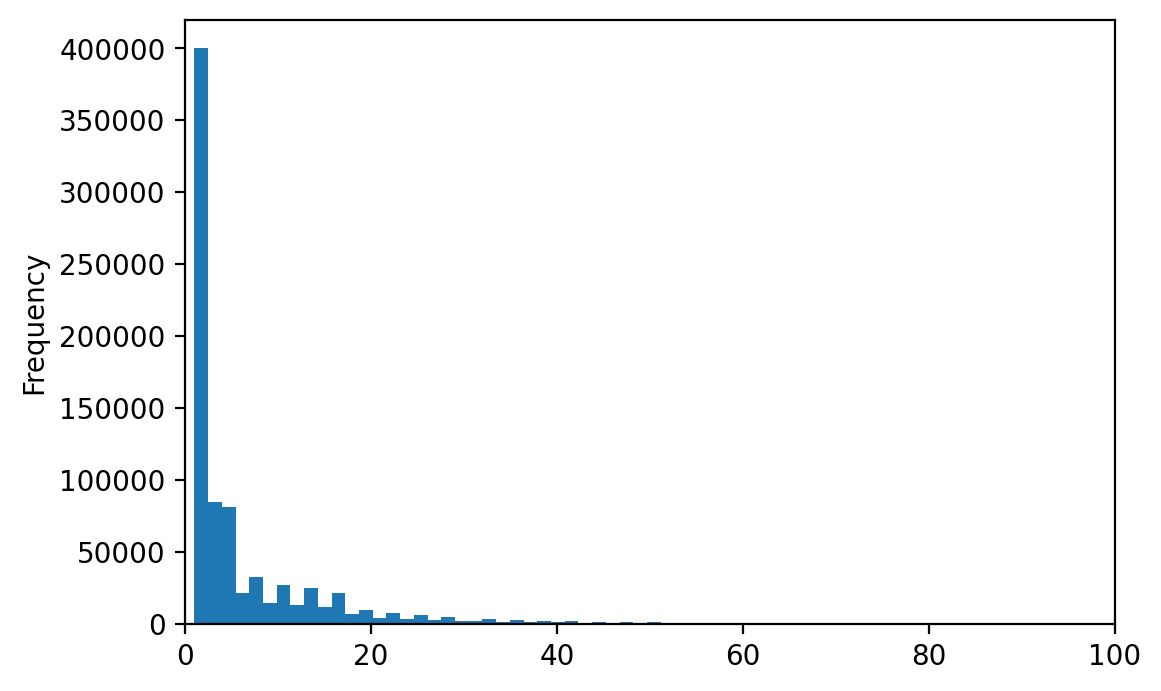

In [36]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
multianno_vcf['READ DEPTH'].plot.hist(bins=200)
plt.xlim(0, 100)

In [37]:
merged_df.to_csv('10847101.hg38_clinvar_manual_merge.csv')